## Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Lendo os dados

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### renomeando todas as colunas

In [ ]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [ ]:
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'generos']

## explorando os dados

In [ ]:
# forma do dataframe (linha x coluna)
avaliacoes.shape

(100836, 4)

In [ ]:
# quantidade de linhas do dataframe
len(avaliacoes)

100836

In [ ]:
# informações estatisticas gerais do dataframe
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
# informação da média do dataframe
avaliacoes.mean()

usuarioId    3.261276e+02
filmeId      1.943530e+04
nota         3.501557e+00
momento      1.205946e+09
dtype: float64

In [ ]:
# informação do valor mínimo do dataframe
avaliacoes.min()

usuarioId            1.0
filmeId              1.0
nota                 0.5
momento      828124615.0
dtype: float64

In [ ]:
# informação da mediana do dataframe
avaliacoes.median()

usuarioId    3.250000e+02
filmeId      2.991000e+03
nota         3.500000e+00
momento      1.186087e+09
dtype: float64

In [ ]:
# descrição estatistica referente a uma unica coluna do dataframe
avaliacoes['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

##### dados referentes a um filme

In [ ]:
notas_filme_1 = avaliacoes.query('filmeId == 1')
notas_filme_1.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946


In [ ]:
notas_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [ ]:
notas_filme_1['nota'].mean()

3.9209302325581397

### agrupando dataframe

In [ ]:
media_dos_filmes = avaliacoes.groupby('filmeId')['nota'].mean()
media_dos_filmes.head(3)

filmeId
1    3.920930
2    3.431818
3    3.259615
Name: nota, dtype: float64

### juntando dois dataframes

In [ ]:
filmes_com_media = filmes.join(media_dos_filmes, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#### ordenando um dataframe

In [ ]:
# por padrão, a ordenação é do menos para o maior
filmes_com_media.sort_values('nota')

,filmeId,titulo,generos,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [ ]:
# para deixar do maior para o menor, devemos usar o ascending=False
filmes_com_media.sort_values('nota', ascending=False)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


### plotando alguns gráficos

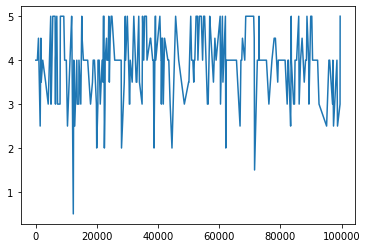

In [ ]:
# grafico de linhas com todas as notas do filmeId == 1
avaliacoes.query('filmeId == 1')['nota'].plot()

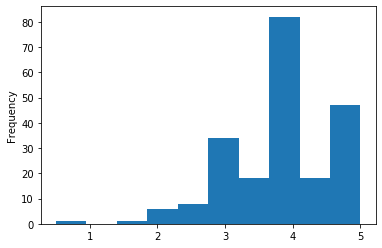

In [ ]:
# plotando um histograma das notas
avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist')

In [ ]:
notas_do_filme_1 = avaliacoes.query('filmeId == 1')['nota']

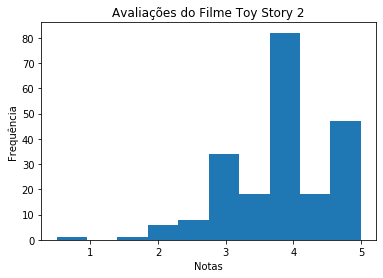

In [ ]:
# plotando um histograma das notas e tratando o gráfico
notas_do_filme_1.plot(kind='hist', 
                      title='Avaliações do Filme Toy Story 2')

plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.show()

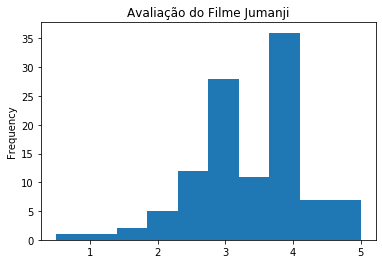

In [ ]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist',
                                             title='Avaliação do Filme Jumanji')

plt.show()

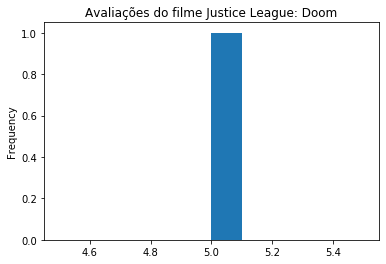

In [ ]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title='Avaliações do filme Justice League: Doom')
plt.show()

# Desafio 1:

Encontar os filmes que não obtiveram avaliação.

In [ ]:
filmes_sem_avaliacao = filmes_com_media[filmes_com_media['nota'].isnull()]
filmes_sem_avaliacao

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [ ]:
filmes_com_media.loc[filmes_com_media['nota'].isnull() == True]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [ ]:
print(f"Analisando a coluna ['notas'], encontramos ao todo, {len(filmes_sem_avaliacao)} filmes sem avaliação.")

Analisando a coluna ['notas'], encontramos ao todo, 18 filmes sem avaliação.


# Desafio 2:

Trocar o nome da coluna "nota" para "media" após o join

In [ ]:
filmes_com_media.rename({'nota': 'media'}, axis=1, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3:

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [ ]:
avaliacoes_por_filme = avaliacoes.groupby('filmeId')['nota'].count()
avaliacoes_por_filme

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [ ]:
filmes_com_media_e_total_notas = filmes_com_media.join(avaliacoes_por_filme, on='filmeId')
filmes_com_media_e_total_notas.rename({'nota': 'totalNotas'}, axis=1, inplace=True)
filmes_com_media_e_total_notas.head()

,filmeId,titulo,generos,media,totalNotas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4:

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [ ]:
filmes_com_media['media'] = filmes_com_media['media'].round(2)
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


# Desafio 5:

Descobrir os generos dos filmes (quais são eles, únicos).

In [ ]:
generos_unicos_filmes = filmes_com_media['generos'].str.split('|', expand=True).stack().unique()
generos_unicos_filmes

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

# Desafio 6:

Contar o número de aparições de cada genero.

In [ ]:
total_genero_filmes = filmes_com_media['generos'].str.split('|', expand=True).stack().value_counts()
total_genero_filmes

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7:

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

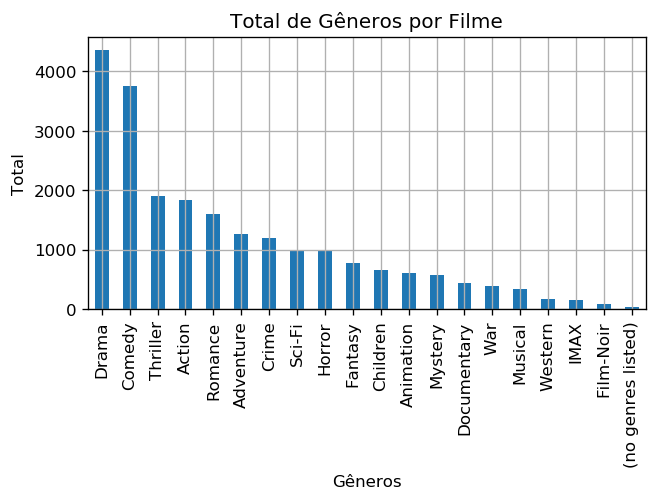

In [ ]:
plt.figure(figsize=(6,3), dpi=120)
total_genero_filmes.plot(kind='bar', grid=True)

plt.title('Total de Gêneros por Filme')
plt.xlabel('Gêneros')
plt.ylabel('Total')
#plt.grid(True, which='both')

plt.show()